In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
dataset=pd.read_csv('C:/dataset/gld_price_data.csv')

In [4]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
dataset.shape

(2290, 6)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
correlation = dataset.corr(numeric_only=True)

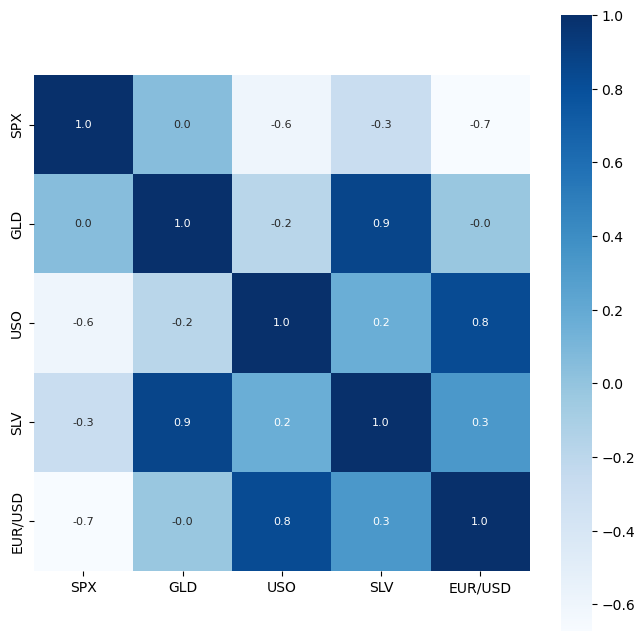

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()

In [16]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


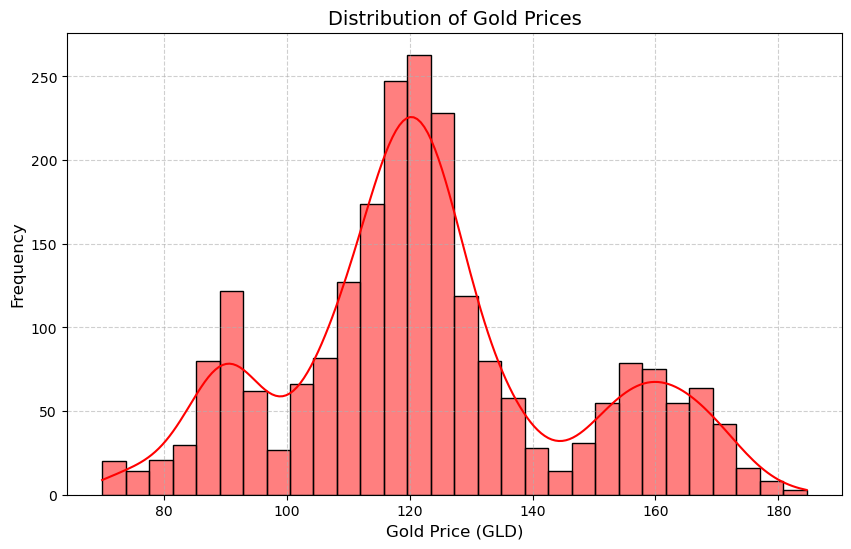

In [18]:
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.histplot(dataset['GLD'], bins=30, kde=True, color='red', edgecolor='black')  # Use histplot instead of displot
plt.title('Distribution of Gold Prices', fontsize=14)  # Add title
plt.xlabel('Gold Price (GLD)', fontsize=12)  # Label x-axis
plt.ylabel('Frequency', fontsize=12)  # Label y-axis
plt.grid(True, linestyle='--', alpha=0.6)  # Add a subtle grid

plt.show()

In [19]:
X=dataset.drop(['Date','GLD'],axis=1)
Y=dataset['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Initialize and train the RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [28]:
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[168.74569978  82.03109993 115.90450026 127.73910062 120.62640135
 154.69759718 150.33629821 126.15900034 117.35619855 126.01770066
 116.67980063 171.82750074 141.36309805 167.90329832 114.93289998
 117.68740034 138.04380357 170.22550088 158.54390256 161.52879934
 155.02530021 125.03689991 175.90419946 157.30510321 125.17590042
  93.7665999   77.25070036 120.61620001 119.16109921 167.40670044
  88.14320045 125.25510075  91.11540078 117.59119997 121.16219917
 137.33860098 115.32870078 115.23500062 147.61959991 107.04260104
 104.19770244  87.04899811 126.53620038 117.74830002 152.99979861
 119.65430023 108.38219993 107.84129863  93.29310058 127.13309766
  74.53270038 113.6476996  121.44710014 111.10809885 118.89249878
 120.21199953 159.20259975 168.25250127 147.11809692  85.78279859
  94.31869994  86.8663991   90.66510045 119.06510055 126.51760063
 127.52150005 170.00290031 122.27679936 117.43339937  98.36909985
 168.17690055 142.98689855 131.84500242 121.30420209 121.23669942
 119.81830

In [29]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R Squared error : ",error_score)

R Squared error :  0.9889204776083436


In [30]:
Y_test=list(Y_test)


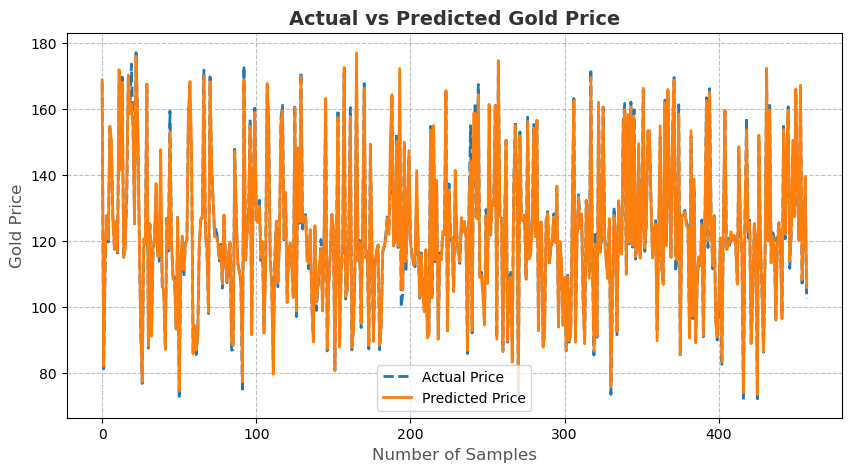

In [37]:
plt.figure(figsize=(10, 5))  
plt.plot(Y_test, color='#1f77b4', linestyle='dashed', linewidth=2, label='Actual Price')  
plt.plot(test_data_prediction, color='#ff7f0e', linestyle='solid', linewidth=2, label='Predicted Price')  
plt.title('Actual vs Predicted Gold Price', fontsize=14, fontweight='bold', color='#333')  
plt.xlabel('Number of Samples', fontsize=12, color='#555')
plt.ylabel('Gold Price', fontsize=12, color='#555')  
plt.legend()  
plt.grid(True, linestyle='--', alpha=0.5, color='gray') 
plt.show()